## importing libreres

In [1]:
import numpy as np
import pandas as pd

### getting ready with data

In [3]:
df = pd.read_csv(r"..\data\car-sales-extended.csv")

In [4]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

C:\Users\ganji thilak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

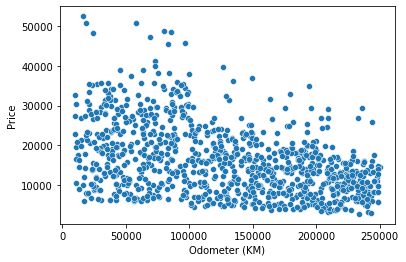

In [49]:
sns.scatterplot(df['Odometer (KM)'],df['Price'])

In [4]:
df['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [5]:
df.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [6]:
df.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [8]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
df.Colour.value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [20]:
df

,Make,Colour,Odometer (KM),Doors,Price
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [22]:
df.drop(index=[0,1],inplace=False)

,Make,Colour,Odometer (KM),Doors,Price
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


## Spliting data

In [9]:
X = df.drop(columns='Price')
y = df['Price']

In [27]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [65]:
df.Make.value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #shift+tab

In [46]:
y_train

29     13586
535    35683
695    16285
557    22825
836    20938
       ...  
106    13283
270     9379
860     5922
435     8753
102     7404
Name: Price, Length: 800, dtype: int64

In [47]:
X_train

,Make,Colour,Odometer (KM),Doors
29,Toyota,White,112004,4
535,Toyota,White,35673,4
695,Toyota,White,146824,4
557,Honda,Black,45152,4
836,Nissan,Blue,69954,4
...,...,...,...,...
106,Toyota,White,218803,4
270,Honda,Blue,223685,4
860,Nissan,White,61876,4
435,Honda,White,28625,4


In [49]:
X_test

,Make,Colour,Odometer (KM),Doors
521,Nissan,Red,196130,3
737,Toyota,Blue,223875,4
740,BMW,Black,11049,3
660,BMW,Blue,209466,5
411,BMW,Blue,72575,5
...,...,...,...,...
408,Toyota,Blue,169449,4
332,Nissan,Blue,195494,4
208,Toyota,Blue,90856,4
613,Honda,Blue,50475,4


In [48]:
y_test

521    13707
737    12650
740    19500
660    26880
411    41294
       ...  
408    10855
332     6460
208    33077
613     8164
78      6502
Name: Price, Length: 200, dtype: int64

### Turn the categories into numbers

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder()
trans = ColumnTransformer([('one_hot',one_hot,
                          ["Make", "Colour", "Doors"])],remainder='passthrough')

In [42]:
from sklearn.compose import make_column_transformer
columtrans = make_column_transformer((OneHotEncoder(),["Make", "Colour", "Doors"]),remainder='passthrough')

In [43]:
df1 = columtrans.fit_transform(df)

ValueError: A given column is not a column of the dataframe

In [7]:
df1 = pd.DataFrame(columtrans.fit_transform(df))

In [8]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0,5716.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0,4001.0


In [17]:
df = trans.fit_transform(df)

ValueError: A given column is not a column of the dataframe

In [18]:
df = pd.DataFrame(df)

In [11]:
df.columns

RangeIndex(start=0, stop=14, step=1)

In [35]:
X = df1.drop(columns=13).values
y = df1.iloc[:,-1].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,random_state=42)

In [37]:
print(y_train)

[13586. 35683. 16285. 22825. 20938. 22263. 15767. 13519. 25763. 15097.
 18396. 34133. 11454. 10821. 25735. 24834. 20532. 31296.  9362. 17152.
 18375. 10726. 10429.  9928.  9073. 28343. 18919. 17597. 19812.  4239.
 29635. 31666. 14028.  6803.  9780.  6866. 18346.  7126. 13106.  7252.
 13434. 16115. 16519. 22643. 10740.  4747. 13310. 18484. 13430.  6431.
 13199.  9184. 13966.  6676.  8179. 15088.  6174. 17315. 29959. 23883.
  9500. 17256. 16519. 10374.  3974. 38984.  7910. 13492. 29656.  7378.
 29616. 11485.  6214. 14404.  4941. 26683. 10316.  5157. 20142. 15967.
  7724. 13394. 10456.  7708. 28013. 28596.  5125. 20642. 35004. 11548.
 17076.  4454. 18029. 26973. 23902.  5094.  5548. 26926. 20306. 19106.
 13176. 15610. 31633. 12547.  7157. 16622. 11982.  8461. 12216. 17664.
 14431. 18919. 15233. 15673. 13147. 12592.  9734. 10301. 29363.  9155.
 18310. 10038. 10676. 17690.  8479. 21326.  6962. 18358. 20219.  4754.
  9104. 20237. 26540. 17065. 15323. 19134. 12186.  9954. 26374. 13244.
 26816

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [48]:
print(X_train)

[[-0.32868411 -0.68205679 -0.48628803 ...  0.3992747  -0.28984624
  -0.2676493 ]
 [-0.32868411 -0.68205679 -0.48628803 ...  0.3992747  -0.28984624
  -1.38630659]
 [-0.32868411 -0.68205679 -0.48628803 ...  0.3992747  -0.28984624
   0.24264988]
 ...
 [-0.32868411 -0.68205679  2.05639446 ...  0.3992747  -0.28984624
  -1.00229253]
 [-0.32868411  1.46615357 -0.48628803 ...  0.3992747  -0.28984624
  -1.48959748]
 [-0.32868411  1.46615357 -0.48628803 ...  0.3992747  -0.28984624
   0.29772467]]


In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3003549932908153

In [23]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X_train = linreg.fit(X_train,y_train)

In [29]:
linreg.predict(X_test)

array([ 7535.31476266, 12075.35737907, 31983.30162783, 22117.53819325,
       29264.31514704, 10947.6482527 ,  8555.62530718, 13711.1319407 ,
       10476.64610897, 16079.30350833, 27914.14330127, 16430.00937019,
       22353.2888707 ,  7567.80453818, 14113.68277046, 22550.01566447,
       14803.48848585, 16554.03428217, 18339.02632725, 14332.58314586,
       29259.72086128, 13119.12166088, 20395.07118284,  8550.34988265,
       22459.4795211 , 20438.03302187, 11244.7574865 , 17079.01490206,
       27860.99576828, 22844.04995309, 18707.11491816, 14459.67164363,
       15788.34947948, 16570.72226956, 17113.00217512, 10752.42480942,
        9453.56298412, 27239.87965824,  8516.11295847, 11708.17997284,
       16711.148334  , 22204.6611156 , 22339.74876505, 14861.40011966,
       18350.30857138, 20240.09375909, 11860.83480543, 10836.6752889 ,
       20659.09378901, 22578.01441304, 12457.10075947,  9263.58665718,
       19756.40276547, 12488.84309744, 13182.85706124, 19887.61387503,
      

In [38]:
from sklearn.svm import SVR
scr = SVR()
scr.fit(X_train,y_train)
scr.score(X_test,y_test)

-0.016818357627918612